In [196]:
import pandas_datareader
import pandas as pd
import numpy as np

In [197]:
pandas_datareader.__version__

'0.10.0'

In [198]:
from pandas_datareader import data

In [199]:
start = '1900/01/01'

In [200]:
end = '2022/02/25' 

In [201]:
df = data.DataReader(['^GSPC'], 'yahoo',start=start, end=end)

In [202]:
prices = df['Adj Close']

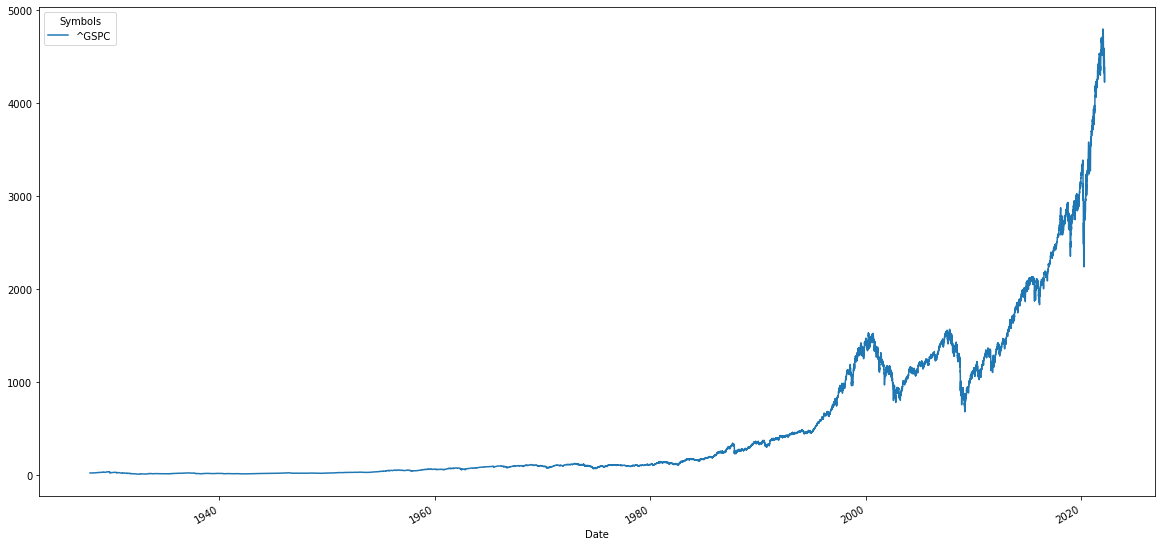

In [203]:
prices.plot(figsize=(20,10), kind='line')

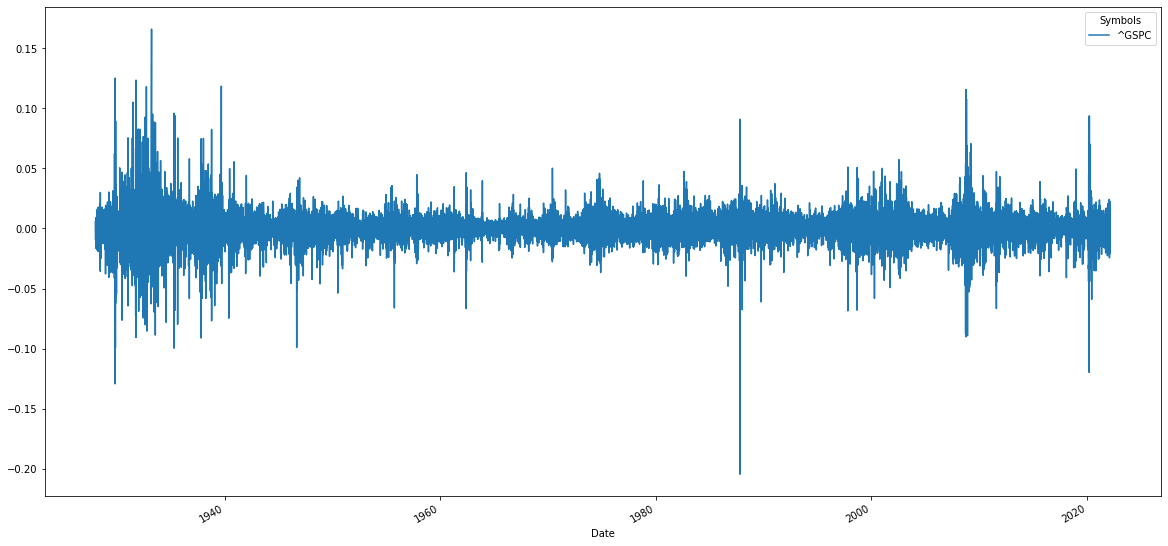

In [204]:
prices.pct_change().plot(figsize=(20,10), kind='line')

In [205]:
ret_index = (1 + prices.pct_change()).cumprod()

In [206]:
ret_index[0:1] = 1

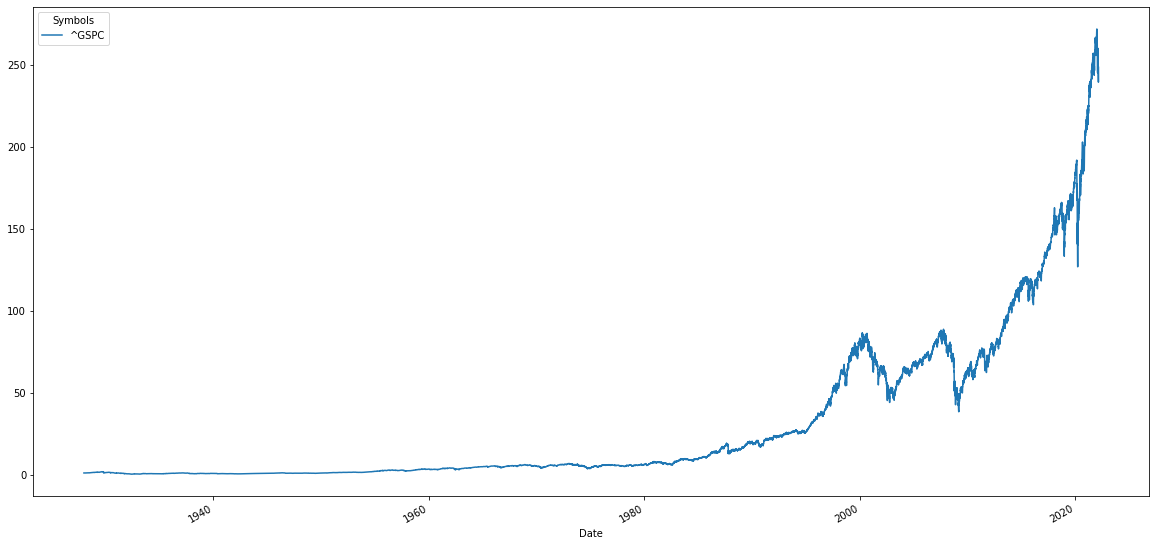

In [207]:
ret_index.plot(figsize=(20,10), kind='line')

In [208]:
ret_index.iloc[-1]-1

Symbols
^GSPC    247.281424
Name: 2022-02-25 00:00:00, dtype: float64

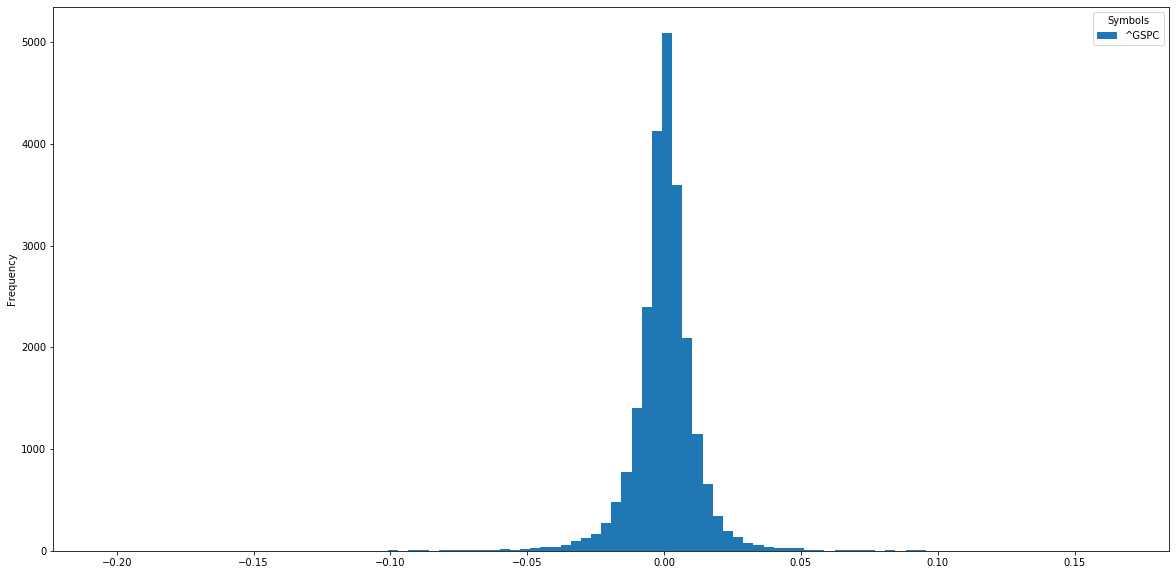

In [209]:
prices.pct_change().plot(figsize=(20,10), kind='hist', bins=100)

In [210]:
prices.pct_change().describe()

Symbols,^GSPC
count,23651.000000
mean,0.000305
std,0.011962
min,-0.204669
25%,-0.004526
50%,0.000493
75%,0.005432
max,0.166096


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f8c02d950>]],
      dtype=object)

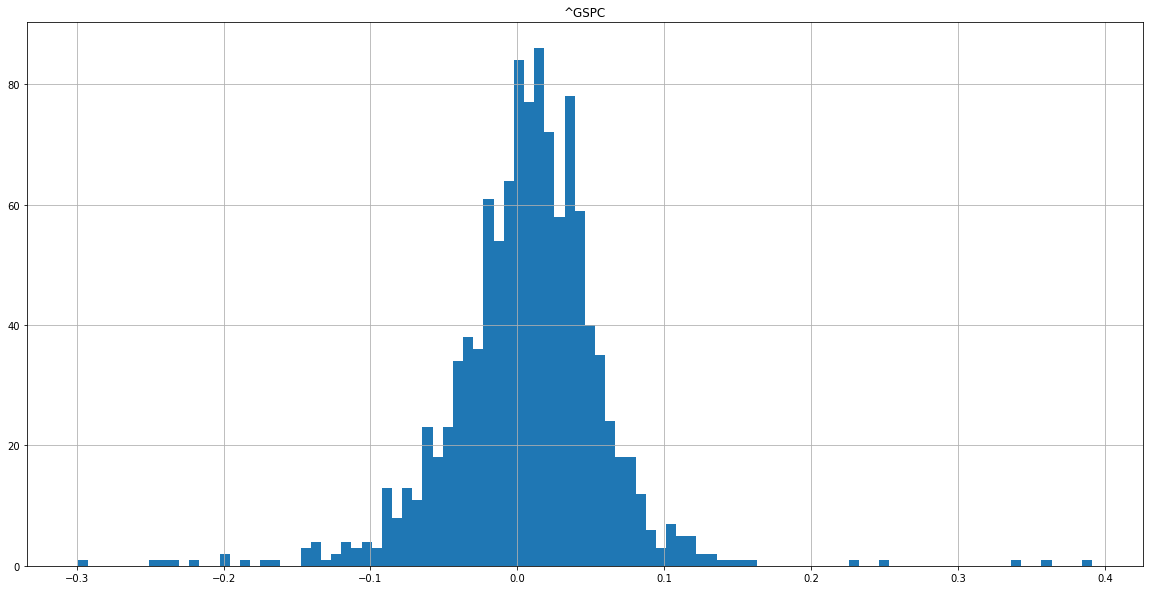

In [236]:
prices.resample('M').last().pct_change().hist(figsize=(20,10), bins=100)

In [237]:
prices.resample('M').last().pct_change().describe()

Symbols,^GSPC
count,1130.000000
mean,0.006335
std,0.053647
min,-0.299423
25%,-0.019061
50%,0.009146
75%,0.035776
max,0.391376


In [271]:
(-.10 - .006335) / .053647

-1.9821238839077677

In [248]:
import scipy.stats as st

In [272]:
st.norm.cdf(-1.98)

0.023851764341508513

In [213]:
prices.resample('M').last()

Symbols,^GSPC
Date,
1927-12-31,17.660000
1928-01-31,17.570000
1928-02-29,17.260000
1928-03-31,19.280001
1928-04-30,19.750000
...,...
2021-10-31,4605.379883
2021-11-30,4567.000000
2021-12-31,4766.180176


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f87b83390>]],
      dtype=object)

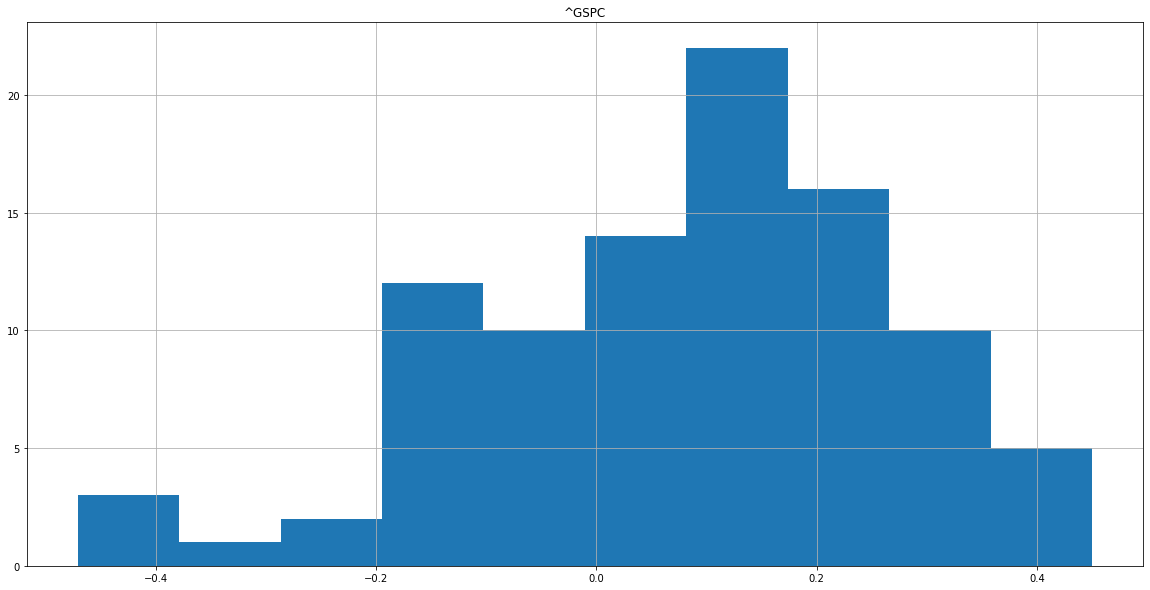

In [243]:
prices.resample('Y').last().pct_change().hist(figsize=(20,10), bins=10)

In [215]:
prices.resample('Y').last().pct_change().describe()

Symbols,^GSPC
count,95.000000
mean,0.078003
std,0.189621
min,-0.470665
25%,-0.057062
50%,0.107868
75%,0.209716
max,0.450222


In [216]:
prices.pct_change()[prices.pct_change() < -.10].dropna()

Symbols,^GSPC
Date,
1929-10-28,-0.129403
1929-10-29,-0.101583
1987-10-19,-0.204669
2020-03-16,-0.119841


In [217]:
prices.loc['2020-03-12':'2020-03-17']

Symbols,^GSPC
Date,
2020-03-12,2480.639893
2020-03-13,2711.020020
2020-03-16,2386.129883
2020-03-17,2529.189941
